In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from ipywidgets import interact, Dropdown

In [2]:
df = pd.DataFrame()

In [3]:
for csv in glob.glob('estabelecimentos/*csv'):
    data = pd.read_csv(csv, sep = ';')
    df = df.append(data)

In [4]:
cols = [
    'região',
    'uf',
    'fonte_desl', 
    'tipoempregador', 
    'tipoestabelecimento', 
    'tamestabjan'
]

In [5]:
df = df.drop(cols, axis = 1)

In [6]:
df = df.rename(
    columns = {
        'competência': 'competencia', 
        'município': 'municipio', 
        'seção': 'secao', 
        'saldomovimentação': 'saldo'
    }
)

In [7]:
df = df.loc[df['municipio'] == 352590]

In [8]:
df_grouped = \
    df.groupby([
        'competencia', 
        'secao', 
        'subclasse']
    ).agg({
        'admitidos': 'sum', 
        'desligados': 'sum', 
        'saldo': 'sum'}) \
    .reset_index()

In [9]:
data_dict = {}

for period in df_grouped['competencia'].unique():
    data_dict[period] = {}
    
    for section in df_grouped.loc[df_grouped['competencia'] == period]['secao'].unique():
        data_dict[period][section] = list(
            df_grouped.loc[
                (df_grouped['competencia'] == period) & 
                (df_grouped['secao'] == section)
            ]['subclasse'].values
        )

In [10]:
# dd_period = Dropdown(options = data_dict.keys())
# dd_section = Dropdown(options = data_dict[dd_period.value].keys())
# dd_subclasse = Dropdown(options = data_dict[dd_period.value][dd_section.value])

In [11]:
df_plot = df.loc[df['secao'] == 'G'].groupby('competencia').agg({'saldo': 'sum'}).reset_index()

In [12]:
df_plot['competencia'] = df_plot['competencia'].astype(str)

In [13]:
df_plot['competencia'] = df_plot['competencia'].apply(lambda x: x[4:] + '/' + x[2:4])

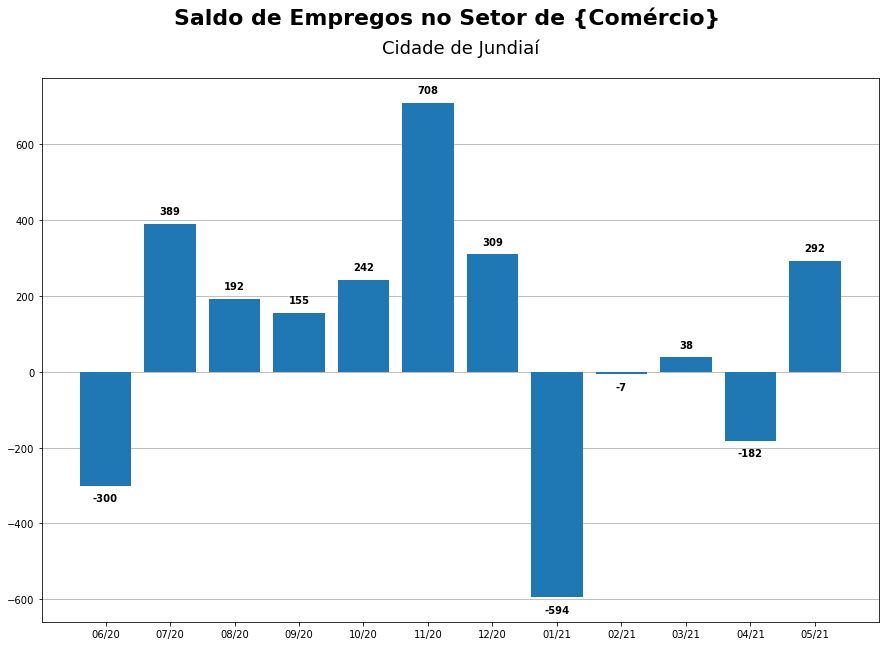

In [14]:
fig, ax = plt.subplots(figsize = (15, 10))

plt.suptitle('Saldo de Empregos no Setor de {Comércio}', fontsize = 22, fontweight = 'bold')
plt.title('Cidade de Jundiaí', fontsize = 18, y = 1.035)

graph = ax.bar(df_plot['competencia'].values, df_plot['saldo'].values, zorder = 2)

for bar in graph:
    height = bar.get_height()

    if height > 0:
        v_align = 'bottom'
        y_pos = height + 20
    else:
        v_align = 'top'
        y_pos = height - 20

    ax.text(bar.get_x() + bar.get_width() / 2, y_pos, height, ha = 'center', va = v_align, fontweight = 'bold')

plt.grid(axis = 'y', zorder = 0)
plt.show()